In [ ]:
# Topic Modelling
## Importing libraries

In [ ]:
import ast
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('indeed_scrape_clean.csv')
df.lemmatized = [ast.literal_eval(i) for i in df.lemmatized.to_list()]
df['lemma_str'] = [' '.join(map(str, l)) for l in df['lemmatized']]

In [3]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,ability,able,access,account,across,activity,ad,advance,advancement,agency,...,without,wonderful,work,worker,working,workplace,world,would,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3125,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3126,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3127,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0


In [4]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [5]:
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
google learn share different see idea others experience really fun
Topic 1:
de que la en para le empresa un con el
Topic 2:
work many people enjoy team lot google challenge task office
Topic 3:
work learn great place lot part job fun good management
Topic 4:
work get company google make job time like always go
Topic 5:
google team project manager work employee time contractor manage start
Topic 6:
work google good job great company management employee free food
Topic 7:
worker co customer day new service google product typical call
Topic 8:
work great would company people environment experience google time place
Topic 9:
day job travel problem would work store map stay test


In [ ]:
#pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
#pyLDAvis.show(panel)
panel

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,ability,able,access,account,across,activity,ad,advance,advancement,agency,...,without,wonderful,work,worker,working,workplace,world,would,year,young
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.076116,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.192887,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.127086,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.327698,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.182369,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.138062,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.082552,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.220679,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3126,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.170117,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3127,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.230409,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)

In [8]:
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
work place life environment balance best fun friendly enjoy love
Topic 1:
share google learn meaning organizations basic nature completely collaborative reward
Topic 2:
de que empresa la en para ambiente trabajo un el
Topic 3:
great people food experience perk place environment benefit opportunity free
Topic 4:
good food management environment nice facility culture friendly really experience
Topic 5:
google experience work service love would business express one product
Topic 6:
job part day hard get enjoyable would time typical work
Topic 7:
lot learn new thing opportunity people technology always grow many
Topic 8:
company employee contractor time like full care benefit treat contract
Topic 9:
team project management manager help member work skill supportive lead


In [9]:
nmf_topic_values = nmf.transform(tfidf)
df['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
df['lda_topics'] = lda_topic_values.argmax(axis=1)

In [10]:
lda_remap = {0: 'Good Design Processes', 
             1: 'Great Work Environment', 
             2: 'Flexible Work Hours', 
             3: 'Skill Building', 
             4: 'Difficult but Enjoyable Work', 
             5: 'Great Company/Job', 
             6: 'Care about Employees', 
             7: 'Great Contractor Pay', 
             8: 'Customer Service', 
             9: 'Unknown1'}
df['lda_topics'] = df['lda_topics'].map(lda_remap)
nmf_remap = {0: 'Fun Work Culture', 
             1: 'Design Process', 
             2: 'Enjoyable Job', 
             3: 'Difficult but Enjoyable Work',
             4: 'Great Experience', 
             5: 'Perks', 
             6: 'Learning Opportunities', 
             7: 'Great Company/Job',
             8: 'Contractor Employee Experience', 
             9: 'Management'}
df['nmf_topics'] = df['nmf_topics'].map(nmf_remap)

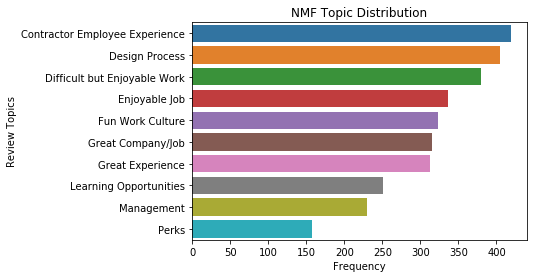

In [11]:
nmf_x = df['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution")
plt.ylabel('Review Topics')
plt.xlabel('Frequency')
plt.show()

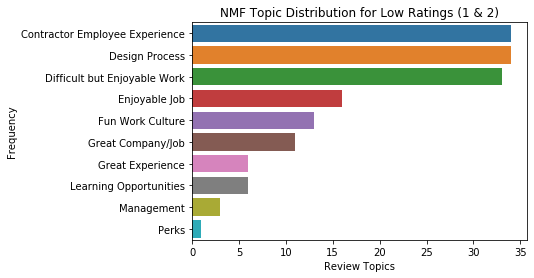

In [12]:
df_low_ratings = df.loc[(df['rating']==1) | (df['rating']==2)]
nmf_low_x = df_low_ratings['nmf_topics'].value_counts()
nmf_low_y = nmf_low_x.sort_index()
sns.barplot(nmf_low_x, nmf_low_y.index)
plt.title("NMF Topic Distribution for Low Ratings (1 & 2)")
plt.ylabel('Frequency')
plt.xlabel('Review Topics')
plt.show()